### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [15]:
# Read data from csv
data = pd.read_csv('data/coupons.csv')

# Display all columns
pd.set_option('display.max_columns', None)

In [284]:
# Sample random 10 rows for checking data
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
6657,Home,Alone,Sunny,55,6PM,Bar,2h,Male,26,Unmarried partner,1,Some college - no degree,Transportation & Material Moving,$12500 - $24999,NaN,1~3,4~8,1~3,4~8,less1,1,1,0,1,0,0
8502,No Urgent Place,Friend(s),Sunny,30,10PM,Restaurant(<20),2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,0,0,0,1,1
2961,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,31,Married partner,1,Some college - no degree,Computer & Mathematical,$37500 - $49999,NaN,never,less1,4~8,less1,less1,1,0,0,0,1,1
9802,Home,Alone,Rainy,55,6PM,Bar,1d,Male,46,Married partner,0,Some college - no degree,Unemployed,$12500 - $24999,NaN,never,less1,4~8,1~3,less1,1,1,1,0,1,0
5921,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,1d,Female,21,Single,0,Some college - no degree,Student,Less than $12500,NaN,gt8,gt8,1~3,less1,never,1,0,0,0,1,1
1479,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,50plus,Unmarried partner,1,Some college - no degree,Retired,$37500 - $49999,NaN,never,1~3,less1,1~3,1~3,1,0,0,0,1,1
7710,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(20-50),2h,Female,31,Single,0,Bachelors degree,Unemployed,$100000 or More,NaN,never,4~8,gt8,4~8,less1,1,1,0,0,1,0
5286,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,1d,Male,46,Unmarried partner,0,Some college - no degree,Transportation & Material Moving,$12500 - $24999,NaN,never,less1,1~3,less1,less1,1,0,0,0,1,1
360,Work,Alone,Sunny,55,7AM,Bar,1d,Male,31,Married partner,1,Graduate degree (Masters or Doctorate),Computer & Mathematical,$100000 or More,NaN,less1,1~3,4~8,4~8,4~8,1,1,1,0,1,0
1756,Home,Alone,Sunny,55,6PM,Bar,1d,Female,26,Single,0,Bachelors degree,Education&Training&Library,$25000 - $37499,NaN,never,1~3,less1,1~3,less1,1,0,0,1,0,1


In [22]:
# Display dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [21]:
# Check null values for all columns
print (data.isna().sum().sort_values())


destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64


In [23]:
# Check Unique values in all columns
pd.set_option("display.max_colwidth", 90)
print(data.apply(lambda col: col.unique()))

destination                                                                         [No Urgent Place, Home, Work]
passanger                                                                     [Alone, Friend(s), Kid(s), Partner]
weather                                                                                     [Sunny, Rainy, Snowy]
temperature                                                                                          [55, 80, 30]
time                                                                                  [2PM, 10AM, 6PM, 7AM, 10PM]
coupon                             [Restaurant(<20), Coffee House, Carry out & Take away, Bar, Restaurant(20-50)]
expiration                                                                                               [1d, 2h]
gender                                                                                             [Female, Male]
age                                                                     [21, 46, 26, 31,

In [25]:
# Check type of data
data.dtypes.value_counts()

object    18
int64      8
dtype: int64

In [27]:
# Convert categorial columns to right datatype
df = data.convert_dtypes()
df.dtypes.value_counts()

string    18
Int64      8
dtype: int64

<Axes: >

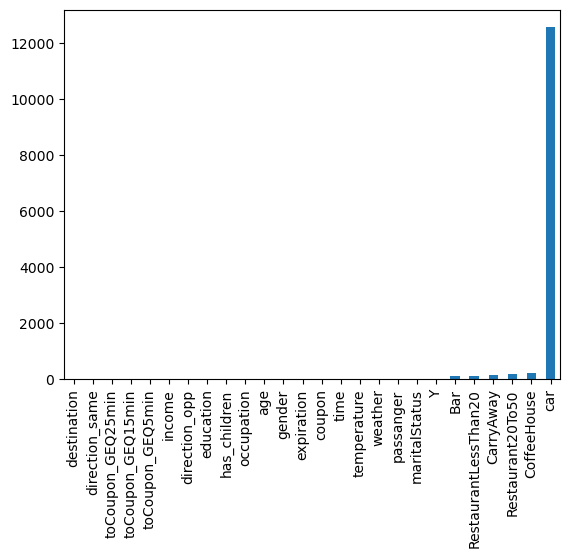

In [33]:
df.isnull().sum().sort_values().plot(kind = 'bar')

In [39]:
# Look into missing values
print(df.apply(lambda col: col.unique())[["car","Bar", "CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]])

car                     [<NA>, Scooter and motorcycle, crossover, Mazda5, do not drive, Car that is too old to...
Bar                                                                           [never, less1, 1~3, gt8, <NA>, 4~8]
CoffeeHouse                                                                   [never, less1, 4~8, 1~3, gt8, <NA>]
CarryAway                                                                     [<NA>, 4~8, 1~3, gt8, less1, never]
RestaurantLessThan20                                                          [4~8, 1~3, less1, gt8, <NA>, never]
Restaurant20To50                                                              [1~3, less1, never, gt8, 4~8, <NA>]
dtype: object


3. Decide what to do about your missing data -- drop, replace, other...

In [44]:
# Drop Car column as most data is missing
df.drop("car", axis=1, inplace=True)

KeyError: "['car'] not found in axis"

In [46]:
# Drop all NA data
df_cleaned = df.dropna()

In [48]:
# Check null values for all columns
print (df_cleaned.isna().sum().sort_values())

destination             0
direction_same          0
toCoupon_GEQ25min       0
toCoupon_GEQ15min       0
toCoupon_GEQ5min        0
Restaurant20To50        0
RestaurantLessThan20    0
CarryAway               0
CoffeeHouse             0
Bar                     0
income                  0
direction_opp           0
occupation              0
has_children            0
maritalStatus           0
age                     0
gender                  0
expiration              0
coupon                  0
time                    0
temperature             0
weather                 0
passanger               0
education               0
Y                       0
dtype: int64


In [62]:
# Cleanup few columns to make data consistent

## convert "age" column
df_cleaned["age"] = df_cleaned["age"].str.replace(r"plus$","", regex=True)
df_cleaned["age"] = df_cleaned["age"].str.replace(r"^below","", regex=True)
df_cleaned["age"] = df_cleaned["age"].astype("Int64")

AttributeError: Can only use .str accessor with string values!

In [58]:
# Again try to convert data types to valid types
df_cleaned = df_cleaned.convert_dtypes()

## Check age is now converted to integer values
df_cleaned['age'].unique()

<StringArray>
['21', '46', '26', '31', '41', '50', '36']
Length: 7, dtype: string

In [77]:
# Convert the activity ranges into integers
df_cleaned.loc[:,["Bar", "CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]].replace({'never':'0'},inplace=True)
df_cleaned.loc[:,["Bar", "CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]].replace({'less1':'1'},inplace=True)
df_cleaned.loc[:,["Bar", "CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]].replace({'1~3':'3'},inplace=True)
df_cleaned.loc[:,["Bar", "CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]].replace({'gt8':'9'},inplace=True)
df_cleaned.loc[:,["Bar", "CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]].replace({'4~8':'8'},inplace=True)

In [79]:
# After converting activity ranges into integers
print(df_cleaned.apply(lambda col: col.unique())[["Bar", "CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]])
df_cleaned[["Bar", "CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]] = df_cleaned[["Bar", "CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]].astype("Int64")

Bar                     [0, 1, 3, 9, 8]
CoffeeHouse             [1, 8, 3, 9, 0]
CarryAway               [8, 3, 9, 1, 0]
RestaurantLessThan20    [8, 3, 1, 9, 0]
Restaurant20To50        [1, 0, 3, 9, 8]
dtype: object


In [84]:
# Rename incorrectly spelled column
df_cleaned.rename(columns = {'passanger':'passenger'}, inplace = True)

In [86]:
# Convert coupon expiration to same metric in hours
df_cleaned['expiration'].replace({'2h':'2', '1d':'24'},inplace=True)

In [87]:
# Rename expiration column to expiration_hours
df_cleaned.rename(columns = {'expiration':'expiration_hours'}, inplace = True)

In [94]:
# Convert expiration_hours to integer
df_cleaned.expiration_hours.value_counts()
df_cleaned.expiration_hours = df_cleaned.expiration_hours.astype("Int64")

In [88]:
# Overall cleanup outcome
df.shape[0] - df_cleaned.shape[0]

605

In [95]:
# Check overall datatype conversions from original data Vs Cleaned up data
print(df.dtypes.value_counts())

print(df_cleaned.dtypes.value_counts())

string    17
Int64      8
dtype: int64
Int64     15
string    10
dtype: int64


## Data cleanup outcome
- There were 12684 records in original data
- Car column had 99% missing data and hence we dropped it
- Records where other 5 columns "Bar", "CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50" with null data were also dropped
- Age column was cleaned up to make coule of values consistent and integer type 
- Customer outdoor activity like going to bar, carry out, resturant visits etc were converted from ranges to integers
- Incorrect column name for passenger column was fixed
- Converted coupon expiration which was expressed in both hours and days into single hourly metric
- Change expiration column name to expiration_hours
- Final cleaned up data was 12,079 records which is 605 less than original
- Overall 6 columns were converted from string to integers

4. What proportion of the total observations chose to accept the coupon? 



In [159]:
# Calculate Coupon acceptance using filter on accepted coupon column "Y"
Accepted_Coupon= df_cleaned['Y'].value_counts()[1]
print('Total Accepted Coupons:' + str(Accepted_Coupon))
Rejected_Coupon= df_cleaned['Y'].value_counts()[0]
print('Total Rejected Coupons:'+ str(Rejected_Coupon))

Total_Observations = len(df_cleaned)
print('Total Coupons:'+ str(Total_Observations))

## Calculate the overall percentage of accepted coupons
Total_proportion_accepted= "{:.0%}".format(Accepted_Coupon/Total_Observations)
print('Total_%_accepted:'+ str(Total_proportion_accepted))

Total Accepted Coupons:6877
Total Rejected Coupons:5202
Total Coupons:12079
Total_%_accepted:57%


5. Use a bar plot to visualize the `coupon` column.

In [136]:
# Use plotly to create bar plot for coupon column
fig = px.histogram(df_cleaned,x='coupon', color=df_cleaned['Y'].astype('str').replace({'1':'Yes', '0':'No'}) , 
             title="Total Coupons Breakdown", labels={'coupon':'Coupon Types', 'count':'Total Coupons', 'color':'Coupons Accepted'}, 
             color_discrete_sequence=px.colors.qualitative.G10)

fig.update_xaxes(tickangle=45)
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.update_layout(width=1000)
fig.show()


## Observations
- Most coupons were dilevered for Coffee house of which close to 50% were accepted
- Least coupon were delivered for Restaurant(20 -50)
- Only 2 categories for Restaurant(< 20) & Carry Out we see majority of coupons were accepted


6. Use a histogram to visualize the temperature column.

In [148]:
# Use plotly to create histogram for temperature column
fig = px.histogram(df_cleaned,x='temperature', color=df_cleaned['Y'].astype('str').replace({'1':'Yes', '0':'No'}) , 
             title="Total Coupons by Temp.", labels={'temperature':'Temperature (F)', 'count':'Total Coupons', 'color':'Coupons Accepted'}, 
             color_discrete_sequence=px.colors.qualitative.G10_r)

fig.update_layout(xaxis={'categoryorder':'total ascending'},bargap=0.15)
fig.update_layout(width=1000)
fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [151]:
# Create new dataframe for bar coupons only
df_bar = df_cleaned.query('coupon == "Bar"')
df_bar.sample(10)

,destination,passenger,weather,temperature,time,coupon,expiration_hours,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9016,Work,Alone,Sunny,30,7AM,Bar,24,Male,21,Single,0,Some college - no degree,Food Preparation & Serving Related,$87500 - $99999,1,9,3,3,1,1,1,0,1,0,0
5291,No Urgent Place,Partner,Sunny,80,6PM,Bar,2,Male,46,Unmarried partner,0,Some college - no degree,Transportation & Material Moving,$12500 - $24999,0,1,3,1,1,1,1,0,0,1,1
10346,No Urgent Place,Alone,Snowy,30,2PM,Bar,24,Male,21,Single,1,Some college - no degree,Personal Care & Service,$25000 - $37499,3,8,1,0,0,1,0,0,0,1,0
9393,Home,Alone,Rainy,55,6PM,Bar,24,Male,21,Single,0,Bachelors degree,Unemployed,$100000 or More,8,1,3,8,3,1,1,1,0,1,1
11237,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,24,Female,36,Married partner,1,Bachelors degree,Unemployed,$87500 - $99999,1,1,1,1,1,1,1,0,0,1,0
5902,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,2,Female,21,Married partner,1,Some college - no degree,Unemployed,$87500 - $99999,1,3,3,8,8,1,1,0,0,1,0
7423,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2,Female,26,Single,0,Bachelors degree,Computer & Mathematical,$25000 - $37499,1,1,8,3,0,1,1,0,0,1,1
12426,Home,Partner,Sunny,30,10PM,Bar,2,Male,31,Married partner,1,Some college - no degree,Protective Service,$100000 or More,3,1,8,3,8,1,1,1,0,1,1
12570,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2,Male,21,Single,0,Some college - no degree,Student,$12500 - $24999,0,0,3,3,1,1,1,0,0,1,1
11254,Work,Alone,Snowy,30,7AM,Bar,24,Female,36,Married partner,1,Bachelors degree,Unemployed,$87500 - $99999,1,1,1,1,1,1,1,1,0,1,0


2. What proportion of bar coupons were accepted?


In [160]:
# Calculate accepted coupons and percentage for bar coupouns
Accepted_Coupon= df_bar['Y'].value_counts()[1]
print('Total Accepted Coupons:' + str(Accepted_Coupon))
Rejected_Coupon= df_bar['Y'].value_counts()[0]
print('Total Rejected Coupons:'+ str(Rejected_Coupon))

Total_Observations = len(df_bar)
print('Total Coupons:'+ str(Total_Observations))

## Calculate percentage of accepted coupons
Total_proportion_accepted= "{:.0%}".format(Accepted_Coupon/Total_Observations)
print('Total_%_accepted:'+ str(Total_proportion_accepted))

Total Accepted Coupons:788
Total Rejected Coupons:1125
Total Coupons:1913
Total_%_accepted:41%


In [166]:
### Use plotly pie chart to show breakdown of accpeted coupon by No. of visits

fig = px.pie(df_bar,values="Y",names="Bar",hole=.2)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title="Coupon Acceptance by Bar Visits", legend_title="No. of bar visits")
fig.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [218]:

# Filter data based on bar visits
Total_3_Or_Less_Visits = df_bar.query('Bar == [0,1,3]', engine='python') 
Total_more_than_3_Visits = df_bar.query('Bar == [8,9]', engine='python')
Total_Observations_Bar = len(df_bar)

## Calculate rate of acceptance using mean
less_than_3_rate = Total_3_Or_Less_Visits['Y'].mean()*100
more_than_3_rate = Total_more_than_3_Visits['Y'].mean()*100

print('Acceptance Rate for less than 3 bar visits:',str(less_than_3_rate)[:5]+'%\n')
print('Acceptance Rate for more than 3 bar visits:',str(more_than_3_rate)[:5]+'%\n')

Acceptance Rate for less than 3 bar visits: 37.26%

Acceptance Rate for more than 3 bar visits: 76.16%



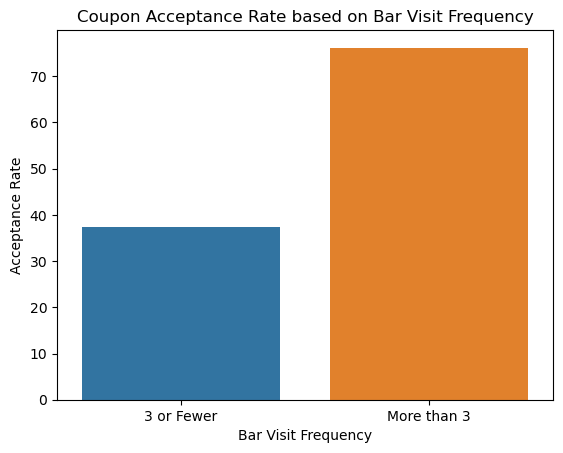

In [203]:
# Define the x-axis values
sns.barplot(x=['3 or Fewer', 'More than 3'], y=[less_than_3_rate, more_than_3_rate])

# Add labels and title to the plot
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.title('Coupon Acceptance Rate based on Bar Visit Frequency')

# Show the plot
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [249]:
# Create two DataFrames based on conditions

more_than_once_over_25yrs = df_bar.query('(Bar != 0 | Bar != 1) & age > 25', engine='python')
less_than_once_below_25yrs = df_bar.query('not((Bar != 0 | Bar != 1) & age > 25)', engine='python')



In [250]:
# Calculate rate using mean
more_than_once_over_25yrs_rate = more_than_once_over_25yrs['Y'].mean()*100
less_than_once_below_25yrs_rate = less_than_once_below_25yrs['Y'].mean()*100

print('Acceptance Rate 25 yrs and visit bar 1 or more times:',str(more_than_once_over_25yrs_rate)[:5]+'%\n')
print('Remaining acceptance rate:',str(less_than_once_below_25yrs_rate)[:5]+'%\n')

Acceptance Rate 25 yrs and visit bar 1 or more times: 38.60%

Remaining acceptance rate: 48.95%



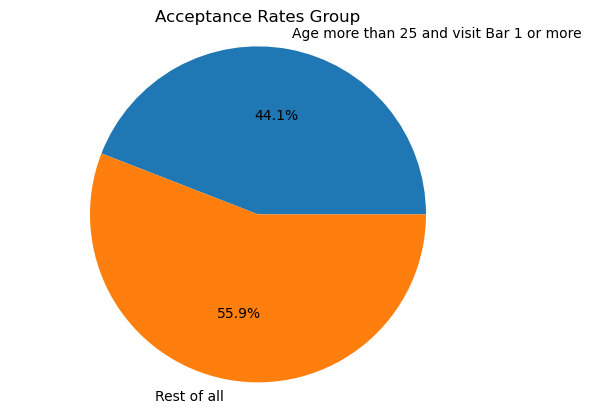

In [251]:
# creating list with both rates
acceptance_rate = [more_than_once_over_25yrs_rate, less_than_once_below_25yrs_rate]
labels =['Age more than 25 and visit Bar 1 or more','Rest of all']

# Create a pie chart
plt.pie(acceptance_rate, labels=labels, autopct='%1.1f%%')
plt.title('Acceptance Rates Group')

# Set aspect ratio to be equal, ensuring circular shape
plt.axis('equal')

# Display the pie chart
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [229]:
# Query data for occupation type Farming, Fishing & Forestry
df_bar.query('occupation == "Farming Fishing & Forestry"', engine='python')

,destination,passenger,weather,temperature,time,coupon,expiration_hours,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8431,No Urgent Place,Kid(s),Rainy,55,10PM,Bar,24,Male,41,Married partner,1,Associates degree,Farming Fishing & Forestry,$25000 - $37499,0,0,0,3,0,1,1,0,0,1,0
8432,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,24,Male,41,Married partner,1,Associates degree,Farming Fishing & Forestry,$25000 - $37499,0,0,0,3,0,1,1,0,0,1,0
8438,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2,Male,41,Married partner,1,Associates degree,Farming Fishing & Forestry,$25000 - $37499,0,0,0,3,0,1,1,0,0,1,0
8445,Home,Alone,Sunny,80,6PM,Bar,2,Male,41,Married partner,1,Associates degree,Farming Fishing & Forestry,$25000 - $37499,0,0,0,3,0,1,0,0,1,0,0
9558,No Urgent Place,Alone,Snowy,30,2PM,Bar,24,Male,31,Married partner,1,Some college - no degree,Farming Fishing & Forestry,$37500 - $49999,1,1,1,3,1,1,0,0,0,1,1
9565,Home,Kid(s),Sunny,30,6PM,Bar,2,Male,31,Married partner,1,Some college - no degree,Farming Fishing & Forestry,$37500 - $49999,1,1,1,3,1,1,1,0,0,1,1
9568,Home,Alone,Rainy,55,6PM,Bar,24,Male,31,Married partner,1,Some college - no degree,Farming Fishing & Forestry,$37500 - $49999,1,1,1,3,1,1,1,1,0,1,1
9571,Work,Alone,Sunny,30,7AM,Bar,24,Male,31,Married partner,1,Some college - no degree,Farming Fishing & Forestry,$37500 - $49999,1,1,1,3,1,1,1,0,1,0,0
9574,Work,Alone,Rainy,55,7AM,Bar,24,Male,31,Married partner,1,Some college - no degree,Farming Fishing & Forestry,$37500 - $49999,1,1,1,3,1,1,1,1,0,1,1


In [246]:
# Create two DataFrames based on conditions
with_passenger_0_Kids_more_than_once = df_bar.query('(Bar != 0 | Bar != 1) & passenger != "Kid(s)" & passenger != "Alone" & occupation != "Farming Fishing & Forestry"', engine='python')

rest_all = df_bar.query('not((Bar != 0 | Bar != 1) & passenger != "Kid(s)" & passenger != "Alone" & occupation != "Farming Fishing & Forestry")', engine='python')

In [248]:
## Find rate for each accepted coupon column Y = 1
with_passenger_0_Kids_more_than_once_rate = with_passenger_0_Kids_more_than_once['Y'].mean()*100
rest_all_rate = rest_all['Y'].mean()*100

print('Acceptance Rate driver with passenger (but no kids) and visit bar 1 or more times:',str(with_passenger_0_Kids_more_than_once_rate)[:5]+'%\n')
print('Remaining acceptance rate:',str(rest_all_rate)[:5]+'%\n')

Acceptance Rate driver with passenger (but no kids) and visit bar 1 or more times: 48.70%

Remaining acceptance rate: 37.94%



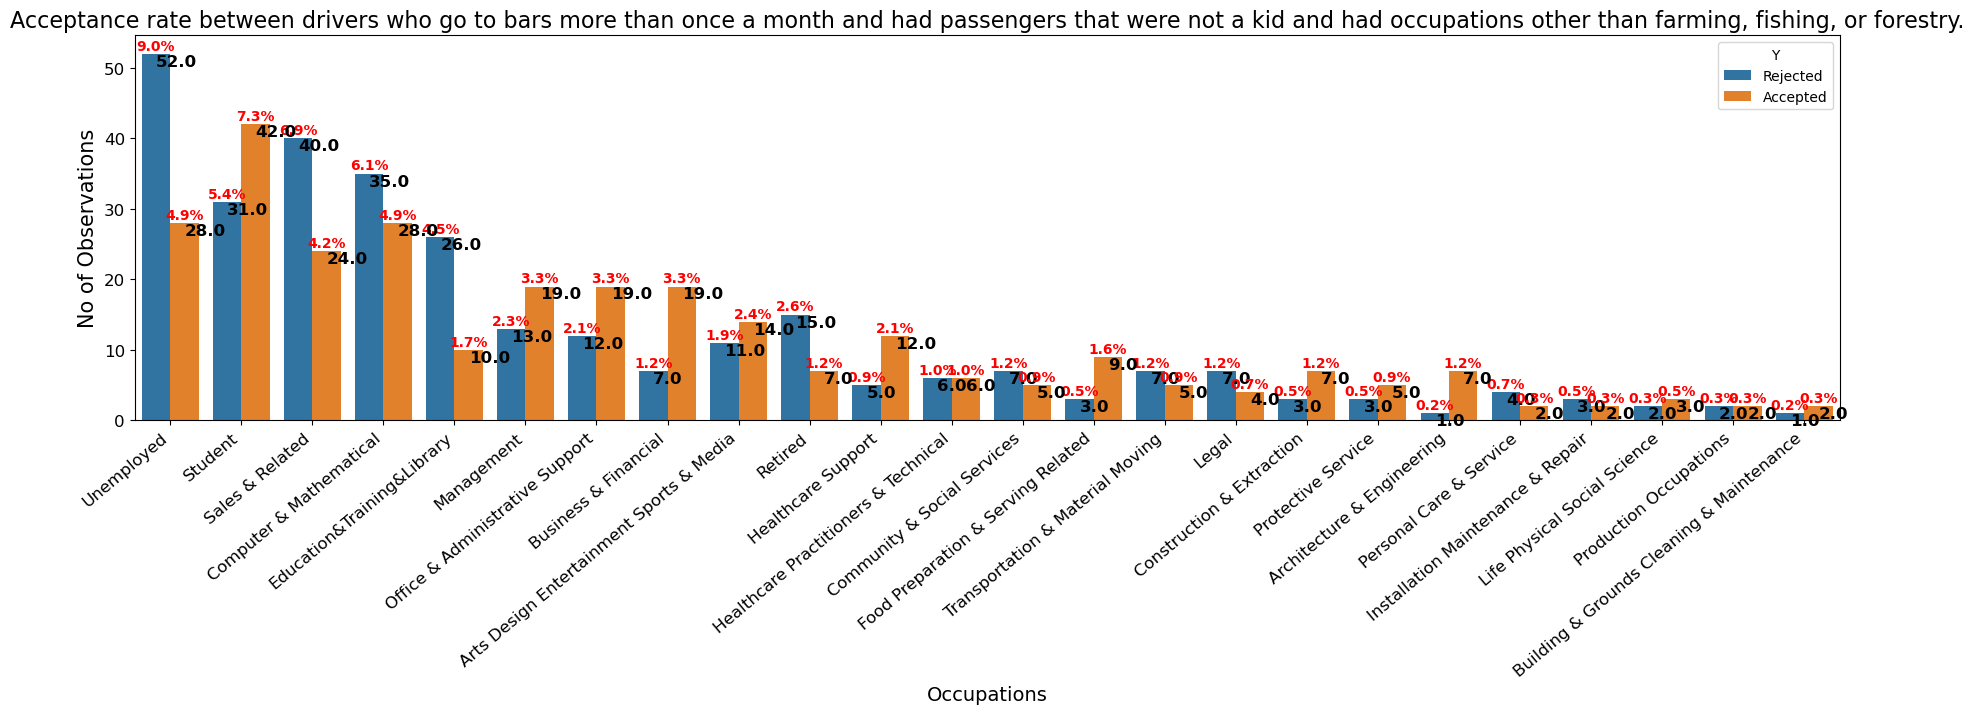

In [273]:
### Use seaborn countplot to show acceptance rate for different occupations

plt.figure(figsize =(22,5))
ax = sns.countplot(data = with_passenger_0_Kids_more_than_once, x = 'occupation', hue = 'Y',order=with_passenger_0_Kids_more_than_once['occupation'].value_counts().index)
plt.xticks(size =12)
plt.xlabel('Occupations', size = 14)
plt.yticks(size = 12)
plt.ylabel('No of Observations', size = 15)
plt.title("Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.", size = 16)
plt.legend(title="Y",labels = ['Rejected','Accepted'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(with_passenger_0_Kids_more_than_once)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    value=p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center',weight='bold',size=10,color='red')
    ax.annotate(value, (x, y),va='top',weight='bold',size=12)    
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*



In [255]:
# Create two separate DataFrames based on conditions
more_than_once_0_Kids_widowed = df_bar.query('(Bar != 0 | Bar != 1) & passenger != "Kid(s)" & passenger != "Alone" & maritalStatus != "Widowed"', engine='python')
less_than_once_with_Kids_not_widowed = df_bar.query('not((Bar != 0 | Bar != 1) & passenger != "Kid(s)" & passenger != "Alone" & maritalStatus != "Widowed")', engine='python')


In [256]:
## Find rate for each accepted coupon column Y = 1
more_than_once_0_Kids_widowed_rate = more_than_once_0_Kids_widowed['Y'].mean()*100
less_than_once_with_Kids_not_widowed_rate = less_than_once_with_Kids_not_widowed['Y'].mean()*100

print('Acceptance Rate widowed driver with passenger (but no kids) and visit bar 1 or more times:',str(more_than_once_0_Kids_widowed_rate)[:5]+'%\n')
print('Remaining acceptance rate:',str(less_than_once_with_Kids_not_widowed_rate)[:5]+'%\n')

Acceptance Rate widowed driver with passenger (but no kids) and visit bar 1 or more times: 48.95%

Remaining acceptance rate: 37.88%



- go to bars more than once a month and are under the age of 30 *OR*


In [258]:
# Create two  DataFrames based on conditions
more_than_once_under_30 = df_bar.query('(Bar != 0 | Bar != 1) & age < 30', engine='python')
less_than_once_under_30 = df_bar.query('not((Bar != 0 | Bar != 1) & age < 30)', engine='python')


In [259]:
## Find rate for each accepted coupon column Y = 1
more_than_once_under_30_rate = more_than_once_under_30['Y'].mean()*100
less_than_once_under_30_rate = less_than_once_under_30['Y'].mean()*100

print('Acceptance Rate over age 30 and visit bar 1 or more times:',str(more_than_once_under_30_rate)[:5]+'%\n')
print('Remaining acceptance rate not matching this criteria:',str(less_than_once_under_30_rate)[:5]+'%\n')

Acceptance Rate over age 30 and visit bar 1 or more times: 48.81%

Remaining acceptance rate not matching this criteria: 35.14%



- go to cheap restaurants more than 4 times a month and income is less than 50K.


In [262]:
# Create two  DataFrames based on conditions
more_than_4_income_under_50 = df_bar.query("((income == 'Less than $12500' | income == '$25000 - $37499' | income == '$37500 - $49999' | income == '$12500 - $24999') & (RestaurantLessThan20 != 0 | RestaurantLessThan20 != 1 | RestaurantLessThan20 != 3))", engine='python')
less_than_4_income_over_50 = df_bar.query("not((income == 'Less than $12500' | income == '$25000 - $37499' | income == '$37500 - $49999' | income == '$12500 - $24999') & (RestaurantLessThan20 != 0 | RestaurantLessThan20 != 1 | RestaurantLessThan20 != 3))", engine='python')

In [263]:
## Find rate for each accepted coupon column Y = 1
more_than_4_income_under_50_rate = more_than_4_income_under_50['Y'].mean()*100
less_than_4_income_over_50_rate = less_than_4_income_over_50['Y'].mean()*100

print('Acceptance Rate income below 50k and visit cheaper restaurants 4 or more times:',str(more_than_4_income_under_50_rate)[:5]+'%\n')
print('Remaining acceptance rate not matching this criteria:',str(less_than_4_income_over_50_rate)[:5]+'%\n')

Acceptance Rate income below 50k and visit cheaper restaurants 4 or more times: 42.27%

Remaining acceptance rate not matching this criteria: 40.06%



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Observations for coupon acceptance for above scenarios
- Overall Bar coupons have close to 50% acceptance rate
- There is only negligible variation in acceptance rate given younger population < 25 years or more > 25 years
- Students tend to accept most bar coupons from total bar coupon population
- Other groups like Business & Management also tend to accept coupons more than reject
- Therefore Occupation does play a role in coupon acceptance rate
- People who go to bar more than 3 times a month tend to accept more coupons V/s people are are infrequent which makes sense given higher freqency of bar visits
- Lower income groups tend to accept more coupon which also makes sense given they prefer spending less
- Having Kids in car or not does impact coupon acceptance rate

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Exploring Coffee House Coupons

In [268]:
df_coffeehouse = df_cleaned.query('coupon == "Coffee House"')
df_coffeehouse.sample(10)

,destination,passenger,weather,temperature,time,coupon,expiration_hours,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
6764,Home,Alone,Sunny,80,6PM,Coffee House,2,Female,31,Married partner,0,Some college - no degree,Arts Design Entertainment Sports & Media,$100000 or More,1,1,9,8,3,1,0,0,1,0,1
6306,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,24,Female,31,Married partner,1,Graduate degree (Masters or Doctorate),Computer & Mathematical,$62500 - $74999,1,8,8,3,0,1,0,0,0,1,1
2255,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24,Male,21,Single,0,Graduate degree (Masters or Doctorate),Computer & Mathematical,$50000 - $62499,0,0,3,1,0,1,1,0,0,1,0
4575,No Urgent Place,Partner,Sunny,80,2PM,Coffee House,2,Female,26,Unmarried partner,0,Graduate degree (Masters or Doctorate),Education&Training&Library,$37500 - $49999,0,3,3,3,1,1,0,0,0,1,1
10313,Work,Alone,Sunny,80,7AM,Coffee House,24,Female,31,Married partner,1,Bachelors degree,Unemployed,$100000 or More,0,8,8,8,1,1,0,0,1,0,1
2133,Work,Alone,Sunny,55,7AM,Coffee House,2,Female,21,Single,0,Some college - no degree,Life Physical Social Science,Less than $12500,1,3,8,9,1,1,1,1,0,1,0
6910,No Urgent Place,Alone,Sunny,55,6PM,Coffee House,2,Male,31,Unmarried partner,0,Some college - no degree,Sales & Related,$62500 - $74999,9,3,3,8,1,1,0,0,0,1,1
6647,No Urgent Place,Friend(s),Sunny,30,10PM,Coffee House,24,Male,26,Unmarried partner,1,Some college - no degree,Transportation & Material Moving,$12500 - $24999,3,8,3,8,1,1,0,0,0,1,1
7907,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,24,Male,26,Married partner,0,Bachelors degree,Education&Training&Library,$50000 - $62499,0,1,3,3,3,1,0,0,0,1,1
4769,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,24,Male,50,Married partner,1,Associates degree,Unemployed,$37500 - $49999,1,1,1,8,1,1,0,0,0,1,1


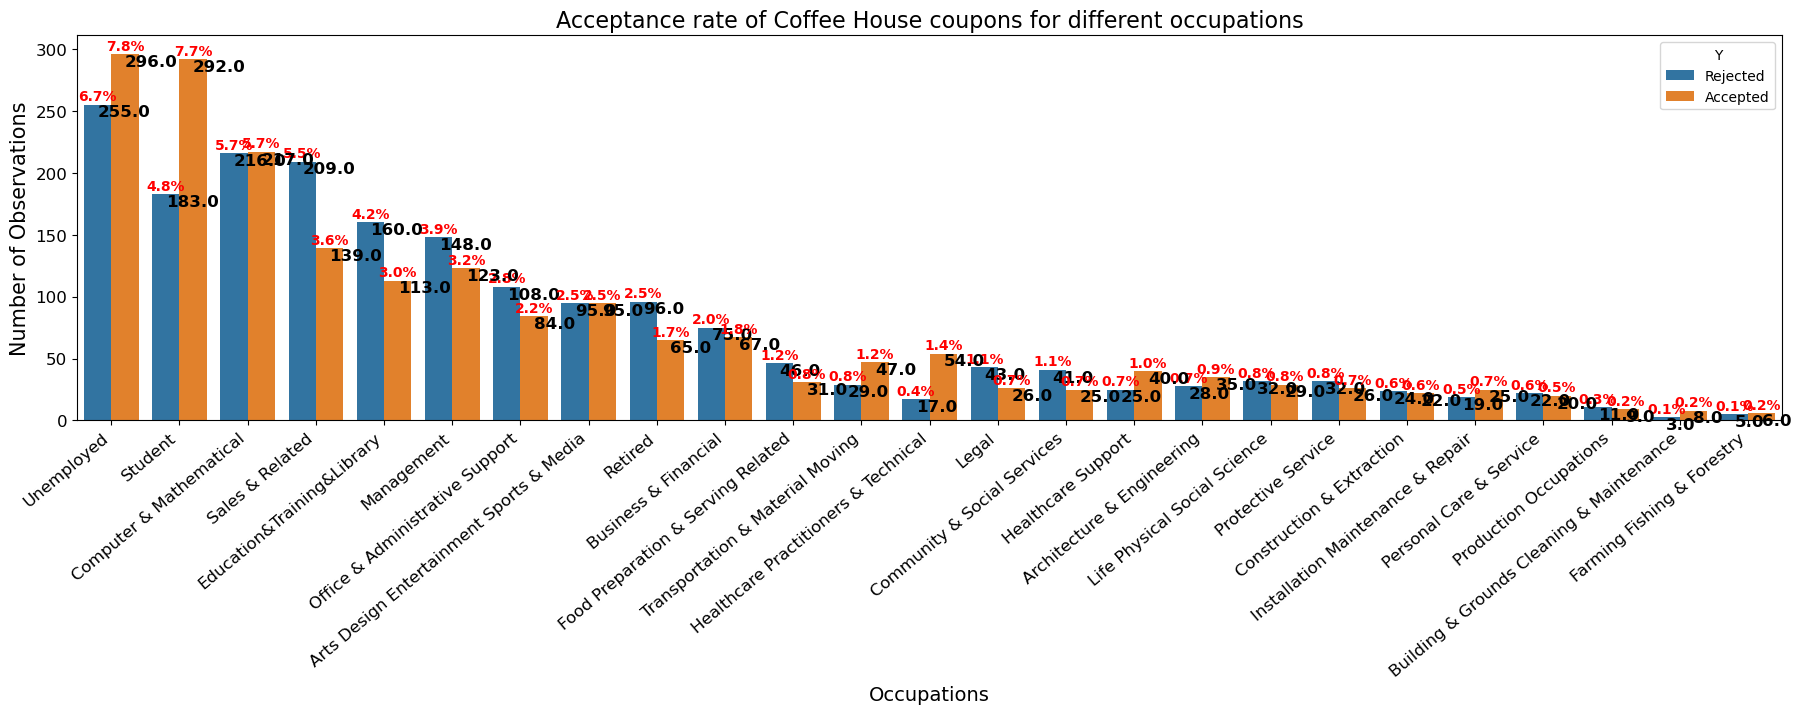

In [272]:
## Vizualize coffee house coupon acceptance 

plt.figure(figsize =(22,5))
ax = sns.countplot(data =df_coffeehouse, x='occupation',hue='Y',order=df_coffeehouse['occupation'].value_counts().index)
plt.xticks(size =12)
plt.xlabel('Occupations', size = 14)
plt.yticks(size = 12)
plt.ylabel('Number of Observations', size = 15)
plt.title("Acceptance rate of Coffee House coupons for different occupations", size = 16)
plt.legend(title="Y",labels = ['Rejected','Accepted'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(df_coffeehouse)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    value=p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center',weight='bold',size=10,color='red')
    ax.annotate(value, (x, y),va='top',weight='bold',size=12)    
plt.show()

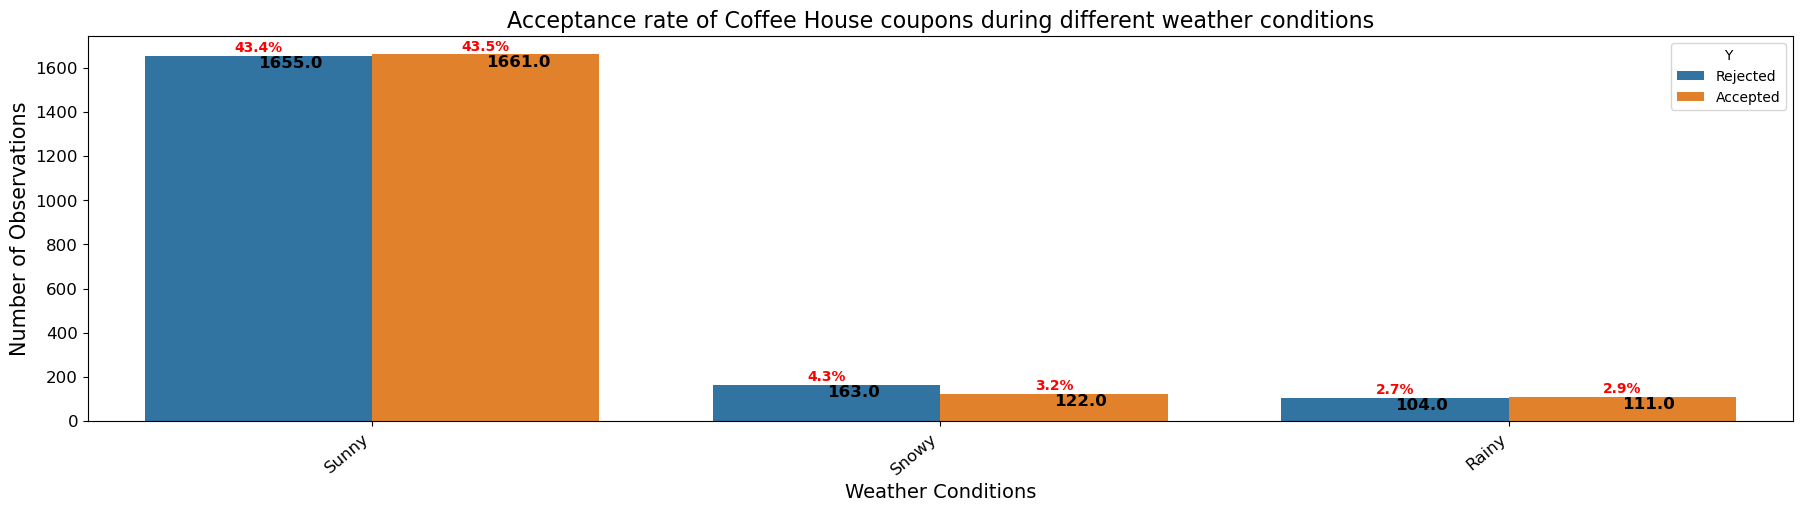

In [274]:
## Vizualize coffee house coupon acceptance by occupations

plt.figure(figsize =(22,5))
ax = sns.countplot(data =df_coffeehouse, x='weather',hue='Y',order=df_coffeehouse['weather'].value_counts().index)
plt.xticks(size =12)
plt.xlabel('Weather Conditions', size = 14)
plt.yticks(size = 12)
plt.ylabel('Number of Observations', size = 15)
plt.title("Acceptance rate of Coffee House coupons during different weather conditions", size = 16)
plt.legend(title="Y",labels = ['Rejected','Accepted'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(df_coffeehouse)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    value=p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center',weight='bold',size=10,color='red')
    ax.annotate(value, (x, y),va='top',weight='bold',size=12)    
plt.show()

In [277]:
## Use plotly pie chart for Coffee house visits for different age group

fig = px.pie(df_coffeehouse,values="Y",names="age",hole=.2)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title="Coupon Acceptance by CoffeeHouse Visits Frequency", legend_title="Age")
fig.show()

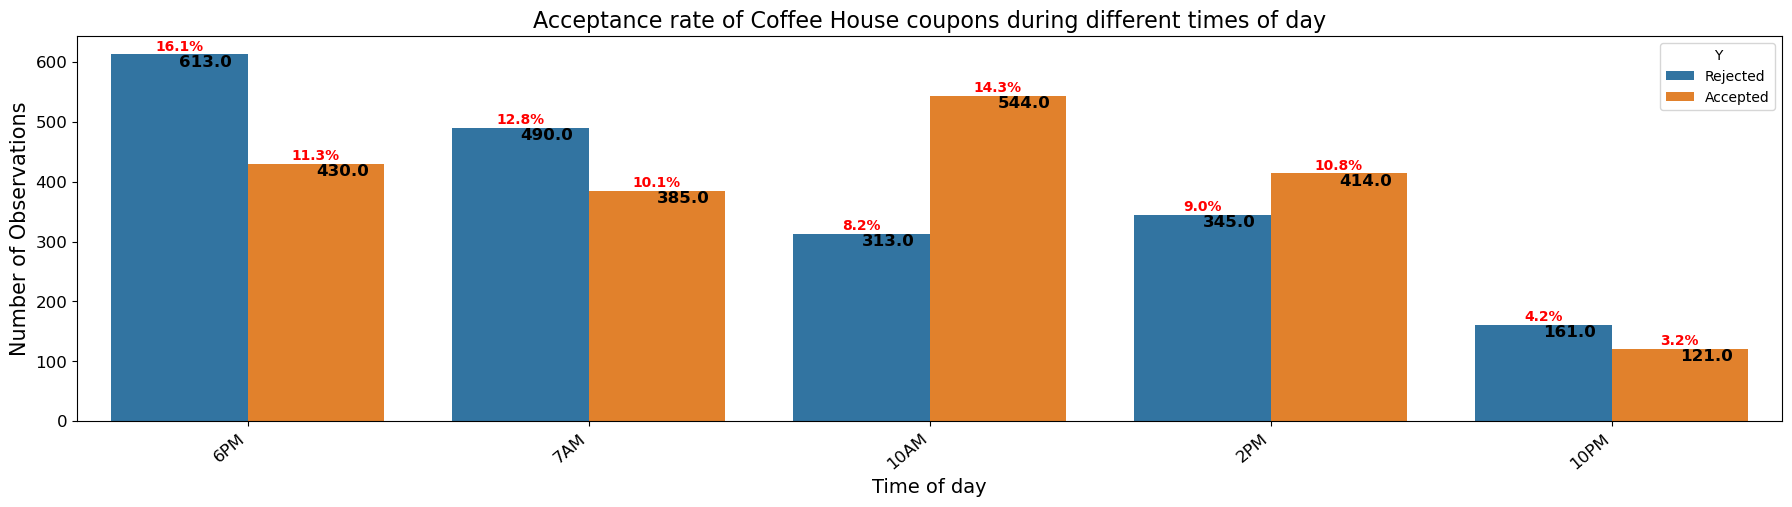

In [282]:
### Vizualize coffee house coupon acceptance by time of day

plt.figure(figsize =(22,5))
ax = sns.countplot(data =df_coffeehouse, x='time',hue='Y',order=df_coffeehouse['time'].value_counts().index)
plt.xticks(size =12)
plt.xlabel('Time of day', size = 14)
plt.yticks(size = 12)
plt.ylabel('Number of Observations', size = 15)
plt.title("Acceptance rate of Coffee House coupons during different times of day", size = 16)
plt.legend(title="Y",labels = ['Rejected','Accepted'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

total = len(df_coffeehouse)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    value=p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center',weight='bold',size=10,color='red')
    ax.annotate(value, (x, y),va='top',weight='bold',size=12)    
plt.show()

## Observations
- Unemployed & Students are contributing accept most coffee house coupons
- Weather does not seem to be a factor in determining coupon acceptance
- Most coupons are accepted either around morning 10AM followed by evening around 6PM
- More coupons were also delivered for above times
- Therefore time of day is importance variable for coupon acceptance